# Computational Methods for Astrophysics, Homework #3, Askold Vilkha

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import lambdify

## Exercise 1, Adaptive Runge-Kutta algorithm 

For this problem, we have to develop a code that implements adaptive Runge-Kutta algorithm. It will use 4th order accurate RK4 method for a single step. Runge-Kutta method is used to numerically evaluate the function $y(x)$ given by:
$$\frac{dy}{dx} = f(y, x)$$
Algorithm needs as input the function $f(y, x)$ and initial conditions $x_0$, $y_0 = y(x_0)$. Using that input and the step size $h$ chosen by user or automatically, RK4 can estimate values of the function $y(x)$ corresponding to $x$ values. The result will be a tabulated function $y(x)$ on the interval $[x_0, x_n]$. The algorithm will calculate weights $k_1, \dots, k_4$ based on the input:
$$k_1 = f(x_n, y_n) ;\, \\
k_2 = f(x_n + \frac{h}{2}, y_n + h\frac{k_1}{2}) ;\,\\
k_3 = f(x_n + \frac{h}{2}, y_n + h\frac{k_2}{2}) ;\,\\
k_4 = f(x_n + h, y_n + hk_3) ;\,\\
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4).$$
$n$ here can start from $0$, when the user provides the initial conditions, and up to the value when $x_n$ reaches the end of the tabulation interval. This is implemented in `RK4_1st_order_step`. $\\$
For adaptive Runge-Kutta algorithm, the user provides tolerance, i. e., maximum allowed error. The algorithm then tries an initial step size $h_0$ defined either by user or calculated automatically based on the interval. With this step size $h_0$ it completes one RK4 step, and two steps with $h_0/2$. Difference of the estimated $y$ values is the local error. If it is less than tolerance, $h = h_0$, if not, the algorithm will assign a different step size $h$, a smaller one. Runge-Kutta truncation (local) accuracy order is $\sim O(h^5)$, so if the local error $\Delta$ is larger than tolerance $\text{tol}$, than the step size $h = h_0 \left|\frac{\text{tol}}{\Delta}\right|^{\frac{1}{5}} = h_0 \left|\frac{\text{tol}}{\Delta}\right|^{0.2}$. However, sometimes the step size could be too small, so the algorithm is very precise but computationally heavy. In that case, the step size will increase, since the factor by which we multiply original step size $h_0$ will be greater than $1$. This is implemented in `RK4_adaptive`.

For this problem, we have to solve a 2nd order ordinary differential equation (ODE):
$$y''(x) = -y, \quad y(0) = 10, \quad y'(0) = 1$$
RK4 method is designed to solve 1st order ODE, but it can be modified to work with 2nd order ones. Any 2nd order ODE can be transformed into a system of two 1st order ODEs by making a substitution $z = y'$. Then, the system of equations will be: 
$$ y' = z ;\,\\
z' = -y.$$
To solve this using RK4 method, we need to define two functions instead of one of the original method:
$$f_1(y, z, x) = z ;\,\\
f_2(y, z, x) = -y.$$
Therefore, the algorithm will be able to solve the system of equations and find $y$ and $z$ values. The RK4 method is then modified to work with two functions instead of one:
$$k_1 = f_1(x_n, y_n, z_n) ;\,\\
k_1' = f_2(x_n, y_n, z_n) ;\,\\
k_2 = f_1(x_n + \frac{h}{2}, y_n + h\frac{k_1}{2}, z_n + h\frac{k_1'}{2}) ;\,\\
k_2' = f_2(x_n + \frac{h}{2}, y_n + h\frac{k_1}{2}, z_n + h\frac{k_1'}{2}) ;\,\\
k_3 = f_1(x_n + \frac{h}{2}, y_n + h\frac{k_2}{2}, z_n + h\frac{k_2'}{2}) ;\,\\
k_3' = f_2(x_n + \frac{h}{2}, y_n + h\frac{k_2}{2}, z_n + h\frac{k_2'}{2}) ;\,\\
k_4 = f_1(x_n + h, y_n + hk_3, z_n + hk_3') ;\,\\
k_4' = f_2(x_n + h, y_n + hk_3, z_n + hk_3').$$
$y_{n+1}$ and $y'_{n+1}$ are calculated the same way as in the original RK4 method, but using the corresponding $k_1, \dots, k_4$ and $k_1', \dots, k_4'$. 
This is implemented in `RK4_2nd_order_step` function. $\\$ 

In [2]:
def test_ode_func(x, y, z):
    '''
    Test function for ODE. This is equivalent to the y'' = -y ODE.
    '''
    return -y

In [3]:
def test_ode_func_prime(x, y, z):
    '''
    Test function for ODE. This is equivalent to the y' = z ODE.
    '''
    return z

In [4]:
def RK4_1st_order_step(func, x_0: float, y_0: float, h: float):
    '''
    This function calculates a single step of the Runge-Kutta 4th order method for a first order ODE. Should be used as an auxillary function for `RK4_step` function.

    Parameters
    ----------
    func : function
        The function that defines the differential equation y' = f(x, y). Must require 2 arguments x, y.
    x_0 : float
        The initial value of x.
    y_0 : float
        The initial value of y.
    h : float
        The step size.

    Returns
    -------
    x_1 : float
        The value of x at x_0 + h.
    y_1 : float
        The value of y at x_0 + h.
    '''

    # RK coefficients k1, k2, k3, k4
    k_1 = func(x_0, y_0)
    k_2 = func(x_0 + h / 2, y_0 + h * k_1 / 2)
    k_3 = func(x_0 + h / 2, y_0 + h * k_2 / 2)
    k_4 = func(x_0 + h, y_0 + h * k_3)

    # resulting approximation of the step
    x_1 = x_0 + h
    y_1 = y_0 + (h / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    return x_1, y_1
    

In [5]:
def RK4_2nd_order_step(func, func_prime, x_0: float, y_0: float, y_0_prime: float, h: float):
    '''
    This function calculates a single step of modified Runge-Kutta method (RK4) for a second order ODE. Should be used as an auxiliary function for `RK4_step` function.

    Parameters
    ----------
    func : function
        The function that defines the differential equation y'' = f(x, y, y'). Must require 3 arguments x, y, z. z here is equivalent to y'.
    func_prime : function
        The function that defines the differential equation y' = f(x, y, y'). Must require 3 arguments x, y, z. z here is equivalent to y'.
    x_0 : float
        The initial value of x.
    y_0 : float
        The initial value of y.
    y_0_prime : float
        The initial value of y'.
    h : float
        The step size.

    Returns
    -------
    x_1 : float
        The value of x at x_0 + h.
    y_1 : float
        The value of y at x_0 + h.
    y_1_prime : float
        The value of y' at x_0 + h.
    '''

    # RK coefficients k1, k2, k3, k4
    k_1 = func_prime(x_0, y_0, y_0_prime)
    k_1_prime = func(x_0, y_0, y_0_prime)
    k_2 = func_prime(x_0 + h / 2, y_0 + h * k_1 / 2, y_0_prime + h * k_1_prime / 2)
    k_2_prime = func(x_0 + h / 2, y_0 + h * k_1 / 2, y_0_prime + h * k_1_prime / 2)
    k_3 = func_prime(x_0 + h / 2, y_0 + h * k_2 / 2, y_0_prime + h * k_2_prime / 2)
    k_3_prime = func(x_0 + h / 2, y_0 + h * k_2 / 2, y_0_prime + h * k_2_prime / 2)
    k_4 = func_prime(x_0 + h, y_0 + h * k_3, y_0_prime + h * k_3_prime)
    k_4_prime = func(x_0 + h, y_0 + h * k_3, y_0_prime + h * k_3_prime)

    # resulting approximation of the step
    x_1 = x_0 + h
    y_1 = y_0 + (h / 6) * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    y_1_prime = y_0_prime + (h / 6) * (k_1_prime + 2 * k_2_prime + 2 * k_3_prime + k_4_prime)

    return x_1, y_1, y_1_prime

In [6]:
def RK4_adaptive_1st_order(func, bracket: list, x_0: float, y_0: float, h: float, tol: float, verbose: bool):
    '''
    This function calculates the solution of a first order ODE using the Runge-Kutta 4th order method with adaptive step size. 
    The step size is adjusted to keep the error below the tolerance level. 
    Also, the step size will be adjusted if the error is too small to avoid unnecessary calculations. The function must be provided in the format y' = f(x, y).
    Should be used as an auxiliary function for `RK4_adaptive` function.

    Parameters
    ----------
    func : function
        The function that defines the differential equation y' = f(x, y). Must require 2 arguments x, y.
    bracket : list
        The bracket for the solution. The solution will be calculated until x reaches the upper bound of the bracket.
    x_0 : float
        The initial value of x.
    y_0 : float
        The initial value of y.
    h : float   
        The initial step size. Must be positive.
    tol : float
        The tolerance level for the error. Must be positive.
    verbose : bool
        If True, the function will print the values of x, y and error at each step.

    Returns
    -------
    x_array : numpy.ndarray
        The array of x values.
    y_array : numpy.ndarray
        The array of y values.
    err_array : numpy.ndarray
        The array of errors.

    Raises
    ------
    ValueError
        If the step size or tolerance level is not positive.
    '''    
    if h is not None and h <=  0:
        raise ValueError(h, r'Step size h must be positive!')
    if tol <= 0:
        raise ValueError(tol, r'Tolerance tol must be positive!')

    # initialize variables
    x = x_0
    y = y_0

    # initialize arrays to store values
    x_array = np.array([x])
    y_array = np.array([y])
    err_array = np.array([0])
    
    # initialize error
    error = tol * 2
    
    while x < bracket[1] and error > tol:
        # take one step with step size h and two steps with step size h/2 and compare the results
        x_1, y_1 = RK4_1st_order_step(func, x, y, h)
        x_2, y_2 = RK4_1st_order_step(func, x, y, h/2)
        x_2, y_2 = RK4_1st_order_step(func, x_2, y_2, h/2)
        error = np.abs(y_2 - y_1) 

        # np.linalg.norm(error) is to make the function compatible with array-valued functions
        error_ref = np.linalg.norm(error)
        # if error is too large, reduce step size and try again
        if error_ref > tol:
            h = h * (tol / error_ref) ** 0.2
            error = error_ref # avoid error being an array and causing problems in the while condition
            continue
        # if the error is too small, increase the step size and try again
        elif error_ref != 0 and np.log10(error_ref) - np.log10(tol) < -3:
            h = h * (tol / error_ref) ** 0.2
            error = tol * 2 # reset error so the code goes through the loop again
            continue

        # if error is small enough, we accept the step and store the values
        x_array = np.append(x_array, x_1)
        y_array = np.append(y_array, y_1)
        err_array = np.append(err_array, error)

        if verbose:
            print(r'x = %g, y = %g, error = %g' % (x_1, y_1, error))

        # we set the starting point for the next step
        x = x_1
        y = y_1
        error = tol * 2

    return x_array, y_array, err_array

In [7]:
def RK4_adaptive_2nd_order(func, bracket: list, x_0: float, y_0: float, h: float, tol: float, func_prime, y_0_prime: float, verbose: bool):
    '''
    This function calculates the solution of a second order ODE using the Runge-Kutta 4th order method with adaptive step size. 
    The step size is adjusted to keep the error below the tolerance level. 
    Also, the step size will be adjusted if the error is too small to avoid unnecessary calculations.
    The function must be provided in the format y'' = f(x, y, y'). `func_prime` must be provided in the format y' = f(x, y, y'). 
    Should be used as an auxiliary function for `RK4_adaptive` function.

    Parameters
    ----------
    func : function
        The function that defines the differential equation y'' = f(x, y, y'). Must require 3 arguments x, y, z. z here is equivalent to y'.
    bracket : list
        The bracket for the solution. The solution will be calculated until x reaches the upper bound of the bracket.
    x_0 : float
        The initial value of x.
    y_0 : float
        The initial value of y.
    h : float
        The initial step size. Must be positive.
    tol : float
        The tolerance level for the error. Must be positive.
    func_prime : function
        The function that defines the differential equation y' = f(x, y, y'). Must require 3 arguments x, y, z. z here is equivalent to y'.
    y_0_prime : float
        The initial value of y'.
    verbose : bool
        If True, the function will print the values of x, y, y' and errors at each step.
    
    Returns
    ------- 
    x_array : numpy.ndarray
        The array of x values.
    y_array : numpy.ndarray
        The array of y values.
    y_prime_array : numpy.ndarray
        The array of y' values.
    err_array : numpy.ndarray
        The array of errors.
    err_prime_array : numpy.ndarray
        The array of errors for y'.

    Raises
    ------
    ValueError
        If the step size or tolerance level is not positive.    
    '''
    if h is not None and h <=  0:
        raise ValueError(h, r'Step size h must be positive!')
    if tol <= 0:
        raise ValueError(tol, r'Tolerance tol must be positive!')

    # initialize variables
    x = x_0
    y = y_0
    y_prime = y_0_prime

    # initialize arrays to store values
    x_array = np.array([x])
    y_array = np.array([y])
    y_prime_array = np.array([y_prime])
    err_array = np.array([0])
    err_prime_array = np.array([0])

    # initialize error
    error = tol * 2

    while x < bracket[1] and error > tol:
        # take one step with step size h and two steps with step size h/2 and compare the results
        x_1, y_1, y_1_prime = RK4_2nd_order_step(func, func_prime, x, y, y_prime, h)
        x_2, y_2, y_2_prime = RK4_2nd_order_step(func, func_prime, x, y, y_prime, h/2)
        x_2, y_2, y_2_prime = RK4_2nd_order_step(func, func_prime, x_2, y_2, y_2_prime, h/2)
        error = np.abs(y_2 - y_1) 

        # np.linalg.norm(error) is to make the function compatible with array-valued functions
        error_ref = np.linalg.norm(error)
        # if error is too large, reduce step size and try again
        if error_ref > tol:
            h = h * (tol / error_ref) ** 0.2
            error = error_ref # avoid error being an array and causing problems in the while condition
            continue
        # if the error is too small, increase the step size and try again
        elif error_ref != 0 and np.log10(error_ref) - np.log10(tol) < -3:
            h = h * (tol / error_ref) ** 0.2
            error = tol * 2 # reset error so the code goes through the loop again
            continue
            
        # if error is small enough, we accept the step and store the values
        x_array = np.append(x_array, x_1)
        y_array = np.append(y_array, y_1)
        err_array = np.append(err_array, error)
        y_prime_array = np.append(y_prime_array, y_1_prime)
        err_prime_array = np.append(err_prime_array, np.abs(y_2_prime - y_1_prime))

        if verbose:
            print(r'x = %g, y = %g, y_prime = %g, error = %g, error_prime = %g' % (x_1, y_1, y_1_prime, error, np.abs(y_2_prime - y_1_prime)))
        
            
        # we set the starting point for the next step
        x = x_1
        y = y_1
        y_prime = y_1_prime
        error = tol * 2
    
    return x_array, y_array, y_prime_array, err_array, err_prime_array

In [8]:
def RK4_adaptive(func, bracket: list, x_0: float = 0, y_0: float = 10, h_0: float = None, tol: float = 1e-14, func_prime = None, y_0_prime: float = 1, verbose: bool = False):
    '''
    This function implements the adaptive Runge-Kutta algorithm to numerically evaluate the function y(x) given by 1st or 2nd order ODE. 
    If the problem is 1st order ODE, the function must be provided in the format y' = f(x, y). 
    If the problem is 2nd order ODE, the function must be provided in the format y'' = f(x, y, y'). 
    This function will determine if the problem is 1st or 2nd order ODE automatically based on the input parameters. 
    If `func_prime` is provided, the problem is assumed to be 2nd order ODE.
    
    Parameters
    ----------
    func : function
        A function to be solved by the algorithm. This function should be obtained from ODE in the format y' = f(x, y), if the problem is 1st order ODE. 
        The function must require only 2 arguments x and y, if `func_prime` is not provided. I. e. user wants to solve 1st order ODE. 
        For second order ODE, the function must require 3 arguments x, y, z. y' is represented by y' = z, where z is the third argument. 
        For 2nd order ODE, this function must be equivalent to y'' = f(x, y, y').
    bracket : list
        The bracket for the solution. The solution will be calculated until x reaches the upper bound of the bracket.
    x_0 : float, optional
        The initial value of x variable, by default 0 (for our exersise problem)
    y_0 : float, optional
        The initial value of y variable, by default 10 (for our exersise problem)
    h_0 : float, optional
        Initial step size, by default None. If None, the algorithm will start with an automatic guess.
    tol : float, optional
        Maximum allowed error, by default 1e-14. 
        Even though 1e-16 is the machine precision, the tests have shown that the computational cost is too high for such a small tolerance level.
    func_prime : function, optional
        An additional function for solving 2nd order ODE. This function should be obtained from ODE in the format y' = f(x, y, y'). Must require 3 arguments x, y, z.
        z here is the third argument, which is equivalent to y'. The default is `None`. If `None`, the problem is assumed to be 1st order ODE.
    y_0_prime : float, optional
        The initial value of y' variable. Must be provided if `func_prime` is provided. The default is 1 (for our exercise problem). 
        If `func_prime` is provided, `y_0_prime` must be provided as well.

    Returns
    -------
    x_array : numpy.ndarray
        The array of x values.
    y_array : numpy.ndarray
        The array of y values.
    err_array : numpy.ndarray
        The array of errors.
    y_prime_array : numpy.ndarray
        The array of y' values. Only returned if `func_prime` is provided.
    err_prime_array : numpy.ndarray
        The array of errors for y'. Only returned if `func_prime` is provided.

    Raises
    ------
    ValueError
        If the step size h_0 or tolerance tol is not positive.
    ValueError
        If `func_prime` is provided, but `y_0_prime` is not provided and vice versa.
    '''
    if h_0 is not None and h_0 <=  0:
        raise ValueError(h_0, r'Step size h must be positive!')
    if tol <= 0:
        raise ValueError(tol, r'Tolerance tol must be positive!')
    if (func_prime is not None) != (y_0_prime is not None):
        raise ValueError("If func_prime is provided, y_0_prime must be provided as well and vice versa!")
    
    # if initial step size h_0 is not specified by user, the code will start with an initial automatic guess
    if h_0 == None:
        h_0 = (bracket[1] - bracket[0]) / 1e5

    if func_prime is None:
        return RK4_adaptive_1st_order(func, bracket, x_0, y_0, h_0, tol, verbose)
    else:
        return RK4_adaptive_2nd_order(func, bracket, x_0, y_0, h_0, tol, func_prime, y_0_prime, verbose)

Now that we have a code that can solve ODEs, we can test it on the examples that we know the analytical solutions for. For the first example, we will use the following ODE:
$$y' = 5y - 3, \quad y(2) = 1$$
We will solve the equation analytically and compare the result with the numerical solution. For analytical solution, we will use the computer algebra package `sympy`.  Specifically, we use the function `dsolve` to solve the ODE. The result is:
$$y(x) = \frac{3}{5} + \frac{2}{5}e^{5(x - 2)}$$

In [9]:
# define symbols
x_sym = symbols('x')
y_sym = Function('y')(x_sym)
y_prime_sym = y_sym.diff(x_sym)

# define and solve ODE
ode_1st_order = Eq(y_prime_sym, 5 * y_sym - 3)
sol_1st_order = dsolve(ode_1st_order, ics = {y_sym.subs(x_sym, 2): 1})
print(r'1st order ODE solution: %s' % sol_1st_order)

1st order ODE solution: Eq(y(x), 2*exp(-10)*exp(5*x)/5 + 3/5)


Now we can plot the numerical and analytical solutions and compare them. The plot is shown below in Fig. 1.

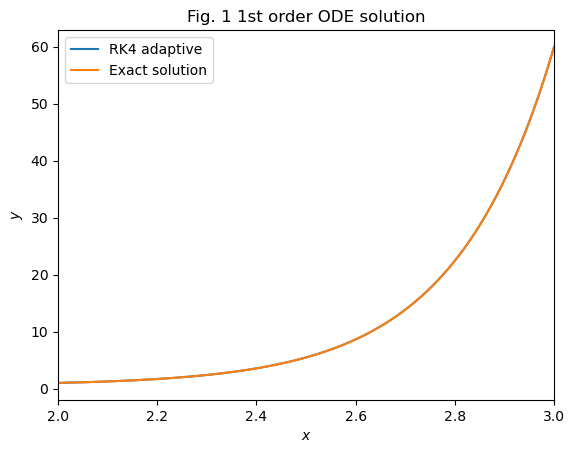

In [10]:
x_test_1st_order, y_test_1st_order, err_test_1st_order = RK4_adaptive(func = lambda x, y: 5 * y - 3, bracket = [2, 3], x_0 = 2, y_0 = 1, func_prime = None, y_0_prime = None)
sol_1st_order_func = lambdify(x_sym, sol_1st_order.rhs)
plt.plot(x_test_1st_order, y_test_1st_order, label = r'RK4 adaptive')
plt.plot(x_test_1st_order, sol_1st_order_func(x_test_1st_order), label = r'Exact solution')
plt.xlim(2, 3)
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.legend()
plt.title(r'Fig. 1 1st order ODE solution');

As we can see, the numerical solution coincides with the analytical one. The error is very small, so it is not visible on the plot. $\\$ Therefore, we can plot the error itself. The plot is shown below in Fig. 2.

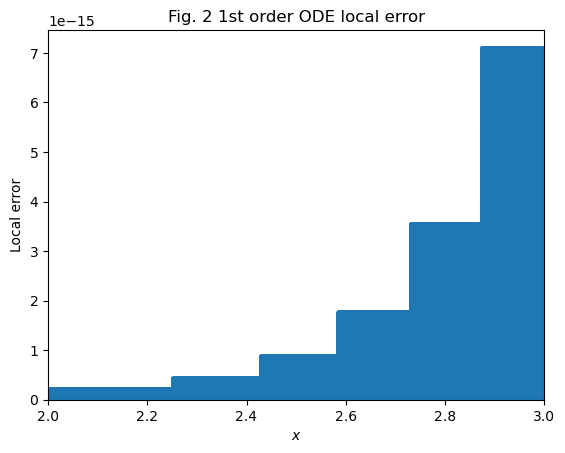

In [11]:
plt.plot(x_test_1st_order, err_test_1st_order)
plt.xlim(2, 3); plt.ylim(bottom = 0)
plt.xlabel(r'$x$'); plt.ylabel(r'Local error')
plt.title(r'Fig. 2 1st order ODE local error');

In [12]:
L_inf_err_1st_order = np.max(err_test_1st_order)
print(r'1st order ODE L_inf error: %g' % L_inf_err_1st_order)

1st order ODE L_inf error: 7.10543e-15


The error increases as $y$ increases, but it is still very small and does not exceed tolerance ($10^{-14}$).  $L^{\infty}$ norm of the error is of the order $10^{-15}$.However this plot only shows the local error of the algorithm. The actual error can be calculated by comparing the numerical solution with the analytical one. The plot is shown below in Fig. 3.

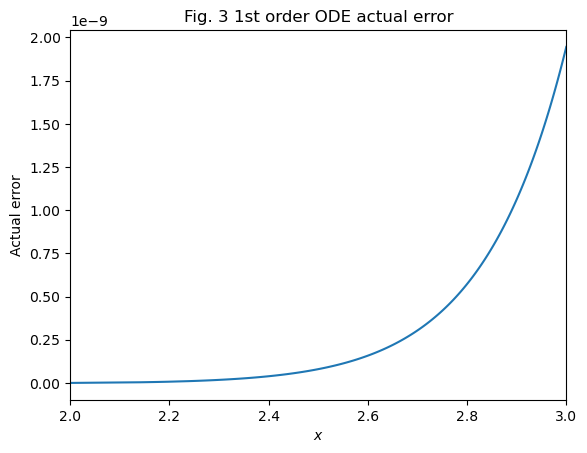

In [13]:
plt.plot(x_test_1st_order, np.abs(y_test_1st_order - sol_1st_order_func(x_test_1st_order)))
plt.xlabel(r'$x$'); plt.ylabel(r'Actual error')
plt.xlim(2, 3)
plt.title(r'Fig. 3 1st order ODE actual error');

In [14]:
L_inf_err_1st_order_actual = np.max(np.abs(y_test_1st_order - sol_1st_order_func(x_test_1st_order)))
print(r'1st order ODE L_inf actual error: %g' % L_inf_err_1st_order_actual)

1st order ODE L_inf actual error: 1.94503e-09


The actual error is larger by 6 orders, but still is very small. $L_{\infty}$ norm of the error is of the order $10^{-9}$. $\\$
Now we can test our algorithm on the 2nd order ODE. We will use the following ODE:
$$y'' = -y, \quad y(0) = 10, \quad y'(0) = 1$$
We can solve this analytically and compare the result with the numerical solution. The analytical solution is obtained using `sympy` package. The result is:
$$y(x) = 10\cos(x) + \sin(x)$$

In [15]:
# define and solve the ODE
ode_2nd_order = Eq(y_prime_sym.diff(x_sym) + y_sym, 0)
sol_2nd_order = dsolve(ode_2nd_order, ics={y_sym.subs(x_sym, 0): 10, y_prime_sym.subs(x_sym, 0): 1})
print(r'2nd order ODE solution: %s' % sol_2nd_order)

2nd order ODE solution: Eq(y(x), sin(x) + 10*cos(x))


Now we can plot the analytical and the numerical solutions and compare them. The plot is shown below in Fig. 4.

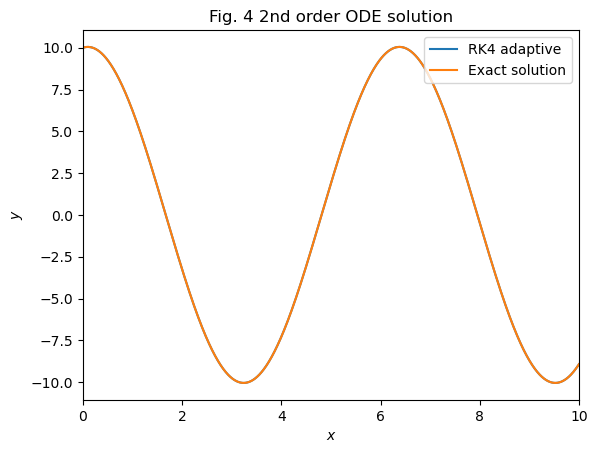

In [16]:
x_test, y_test, y_prime_test, err_test, err_prime_test = RK4_adaptive(func = test_ode_func, bracket = [0, 10], x_0 = 0, y_0 = 10, func_prime = test_ode_func_prime, y_0_prime = 1)
sol_2nd_order_func = lambdify(x_sym, sol_2nd_order.rhs)
plt.plot(x_test, y_test, label = r'RK4 adaptive')
plt.plot(x_test, sol_2nd_order_func(x_test), label = r'Exact solution')
plt.xlim(0, 10)
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.legend()
plt.title(r'Fig. 4 2nd order ODE solution');

Again, the numerical solution is very close to the analytical, so we can not distinguish them on the plot. We can plot the local error of the algorithm and calculate $L^{\infty}$ norm of the error. The plot is shown below in Fig. 5.

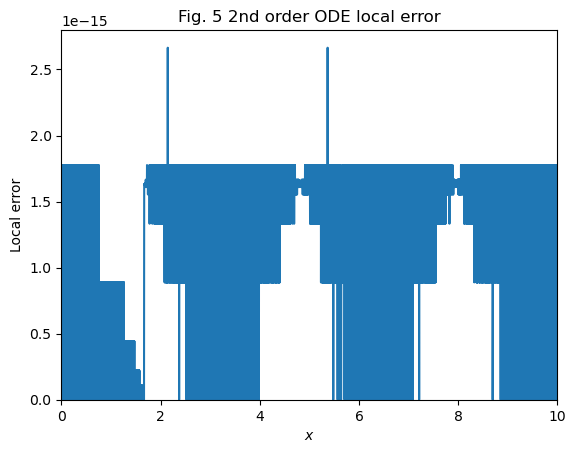

In [17]:
plt.plot(x_test, err_test)
plt.xlim(0, 10); plt.ylim(bottom = 0)
plt.xlabel(r'$x$'); plt.ylabel(r'Local error')
plt.title(r'Fig. 5 2nd order ODE local error');

In [18]:
L_inf_err = np.max(err_test)
print(r'2nd order ODE L_inf error: %g' % L_inf_err)

2nd order ODE L_inf error: 2.66454e-15


The local error is very small, and does not exceed tolerance ($10^{-14}$). $L^{\infty}$ norm of the error is of the order $10^{-15}$. $\\$ 
Now we can plot the actual error of the algorithm. The plot is shown below in Fig. 6.

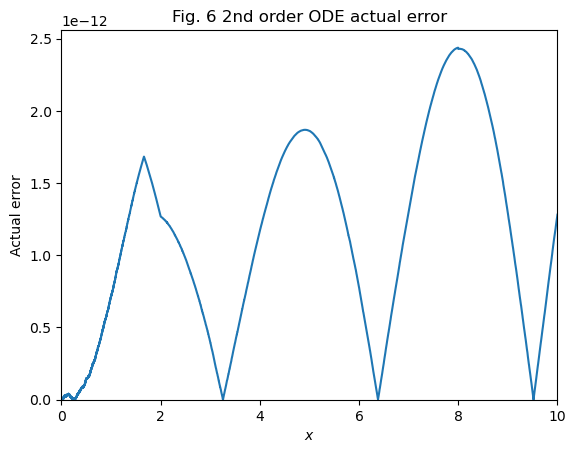

In [19]:
plt.plot(x_test, np.abs(y_test - sol_2nd_order_func(x_test)))
plt.xlabel(r'$x$'); plt.ylabel(r'Actual error')
plt.xlim(0, 10); plt.ylim(bottom = 0)
plt.title(r'Fig. 6 2nd order ODE actual error');

In [20]:
L_inf_err_actual = np.max(np.abs(y_test - sol_2nd_order_func(x_test)))
print(r'2nd order ODE L_inf actual error: %g' % L_inf_err_actual)

2nd order ODE L_inf actual error: 2.43655e-12


Actual error is larger than the local, but is still very small (of the order $10^{-12}$) and does not exceed tolerance ($10^{-14}$). $L^{\infty}$ norm of the error is of the order $10^{-12}$. $\\$ 
We can perform similar tests with the derivative of the test function, since the algorithm returns it as well. This is shown on the plots below in Fig. 7-9.

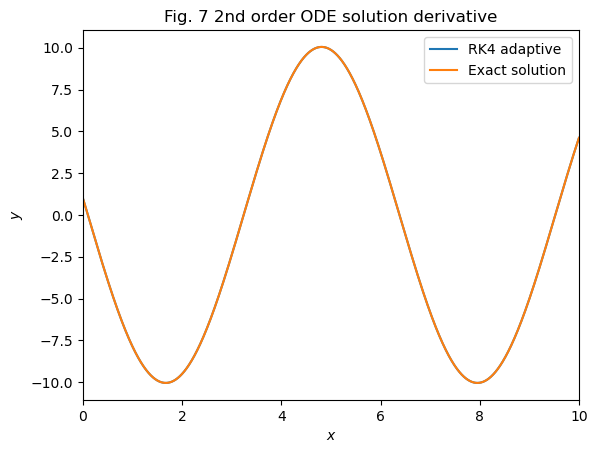

In [21]:
sol_2nd_order_deriv_func = lambdify(x_sym, sol_2nd_order.rhs.diff(x_sym))
plt.plot(x_test, y_prime_test, label = r'RK4 adaptive')
plt.plot(x_test, sol_2nd_order_deriv_func(x_test), label = r'Exact solution')
plt.xlim(0, 10)
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.legend()
plt.title(r'Fig. 7 2nd order ODE solution derivative');

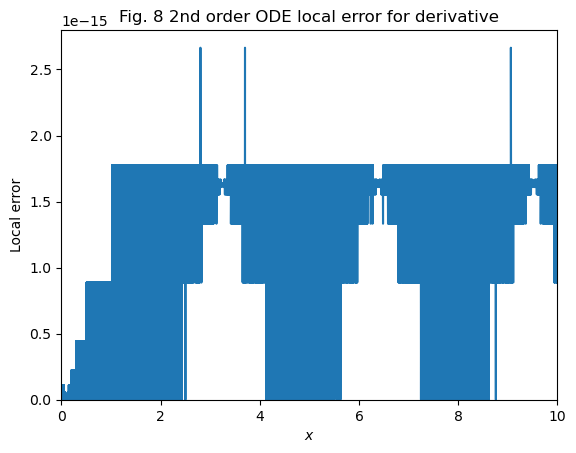

In [22]:
plt.plot(x_test, err_prime_test)
plt.xlim(0, 10); plt.ylim(bottom = 0)
plt.xlabel(r'$x$'); plt.ylabel(r'Local error')
plt.title(r'Fig. 8 2nd order ODE local error for derivative');

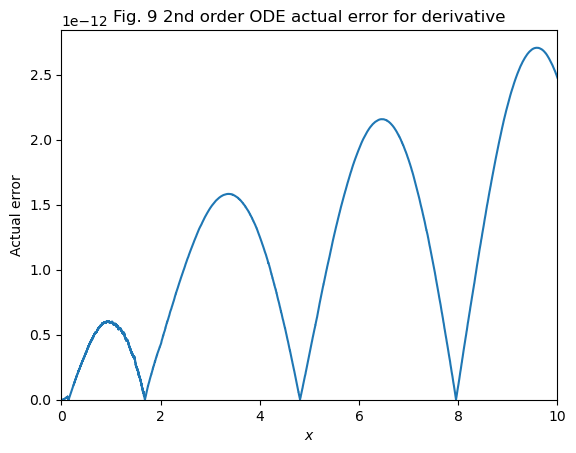

In [23]:
plt.plot(x_test, np.abs(y_prime_test - sol_2nd_order_deriv_func(x_test)))
plt.xlabel(r'$x$'); plt.ylabel(r'Actual error')
plt.xlim(0, 10); plt.ylim(bottom = 0)
plt.title(r'Fig. 9 2nd order ODE actual error for derivative');

Errors show very similar behavior as in the case of the function itself. 

## Exercise 2, Three body problem in Newtonian gravity

For this problem, we are going to describe three gravitating point masses in Newtonian gravity. The masses are $m_1 = 3$, $m_2 = 4$, $m_3 = 5$. They are initially located on the vertices of a right triangle with sides $a = 3$, $b = 4$, $c = 5$. The initial velocities are $v_1 = 0$, $v_2 = 0$, $v_3 = 0$. Masses are proportional to the length of the opposite triangle side. This is shown on Fig. 10.

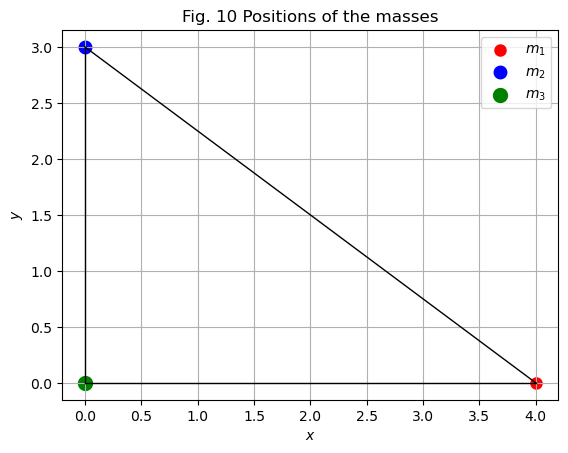

In [24]:
# show the positions of these masses on the x, y plane
plt.scatter(4, 0, label = r'$m_1$', color = 'red', linewidths = 3)
plt.scatter(0, 3, label = r'$m_2$', color = 'blue', linewidths = 4)
plt.scatter(0, 0, label = r'$m_3$', color = 'green', linewidths = 5)
plt.plot([0, 4], [0, 0], color = 'black', linewidth = 1)
plt.plot([0, 0], [0, 3], color = 'black', linewidth = 1)
plt.plot([0, 4], [3, 0], color = 'black', linewidth = 1)
plt.grid(True)
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.legend()
plt.title(r'Fig. 10 Positions of the masses');

Newtonian law of gravity is given by:
$$\vec{F} = -G\frac{m_1m_2}{r^2}\hat{r}$$
where $G$ is the gravitational constant, $m_1$ and $m_2$ are masses of the bodies, $r$ is the distance between them, and $\hat{r}$ is the unit vector pointing from the first body to the second. $\\$
From Newton's second law of motion, we know that:
$$\vec{F} = m\vec{a}$$
where $m$ is the mass of the body and $\vec{a}$ is the acceleration. $\\$
So, for example, if we want to know the acceleration of the first body $a_1$, we can write:
$$\vec{a_1} = \vec{F_1} / m_1 = -G\frac{m_2}{r_{12}^2}\hat{r_{12}} - G\frac{m_3}{r_{13}^2}\hat{r_{13}}$$
where $r_{12}$ is the distance between the first and the second body, $r_{13}$ is the distance between the first and the third body, and $\hat{r_{12}}$ and $\hat{r_{13}}$ are the unit vectors pointing from the first body to the second and the third respectively. $\\$
In fact, unit vectors $\hat{r_{12}}$ and $\hat{r_{13}}$ can be written as $\frac{\vec{r_{12}}}{r_{12}}$ and $\frac{\vec{r_{13}}}{r_{13}}$.
So, the formula would be the following:
$$\vec{a_1} = -G\frac{m_2}{r_{12}^3}\vec{r_{12}} - G\frac{m_3}{r_{13}^3}\vec{r_{13}}$$
Similarly, we can write the acceleration of the second and the third body. Note, that signs change if we have vector $r_{21}$ instead of $r_{12}$, and $r_{31}$ instead of $r_{13}$. In general, if the vector starts at the point, which acceleration we are looking for, then we have a minus sign, in the opposite case, we have a plus sign.$\\$
$$\vec{a_2} = G\frac{m_1}{r_{12}^3}\vec{r_{12}} - G\frac{m_3}{r_{23}^3}\vec{r_{23}} ;\,\\
\vec{a_3} = G\frac{m_1}{r_{13}^3}\vec{r_{13}} + G\frac{m_2}{r_{23}^3}\vec{r_{23}}.$$
We can implement it in the function `Newton_grav_acceleration`. $\\$

In [25]:
def Newton_grav_acceleration(t: float, r_array, v_array, m_array = np.array([3, 4, 5]), G: float = 1):
    '''
    This function calculates the acceleration of the masses due to the gravitational force in Newtonian gravity (first order form).
    Needs as input `m_array` containing masses and `r_array` containing positions of the masses. This function is designed only for 3 body problem.

    Parameters
    ----------
    t : float
        The time. Not used, but needed for compatibility with our ODE solver.
    r_array : numpy.ndarray
        The array of positions of the masses. Must contain 3 arrays that contain x, y and z positions for each mass.
        r_array = 
        [[x_1, y_1, z_1],
         [x_2, y_2, z_2], 
         [x_3, y_3, z_3]]
    m_array : numpy.ndarray
        The array of masses. Must contain 3 elements. The default is np.array([3, 4, 5]).
    G : float, optional
        The gravitational constant. The default is 1.

    Returns
    -------
    a_array : numpy.ndarray
        The array of accelerations of the masses. Has the same format as `r_array`.        
    '''
    # initialize arrays
    a_array = np.zeros((3, 3))
    r_12 = np.zeros(3)
    r_13 = np.zeros(3)
    r_23 = np.zeros(3)
    #r_array = r_v_array[0]
    #v_array = r_v_array[1]

    # calculate distances between the masses
    r_12 = r_array[0] - r_array[1]
    r_13 = r_array[0] - r_array[2]
    r_23 = r_array[1] - r_array[2]

    # calculate accelerations
    a_array[0] = -G * m_array[1] * r_12 / np.power(np.linalg.norm(r_12), 3) - G * m_array[2] * r_13 / np.power(np.linalg.norm(r_13), 3)
    a_array[1] = G * m_array[0] * r_12 / np.power(np.linalg.norm(r_12), 3) - G * m_array[2] * r_23 / np.power(np.linalg.norm(r_23), 3)
    a_array[2] = G * m_array[0] * r_13 / np.power(np.linalg.norm(r_13), 3) + G * m_array[1] * r_23 / np.power(np.linalg.norm(r_23), 3)

    #v_a_array = np.array([v_array, a_array])

    return a_array 

Our goal is to find the equations of motion for the three bodies. In fact, this can be done by solving the system of six 1st order ODEs. We can write the system of equations as:
$$\frac{d\vec{r_1}}{dt} = \vec{v_1} ;\,\\
\frac{d\vec{v_1}}{dt} = \vec{a_1} ;\,\\
\frac{d\vec{r_2}}{dt} = \vec{v_2} ;\,\\
\frac{d\vec{v_2}}{dt} = \vec{a_2} ;\,\\
\frac{d\vec{r_3}}{dt} = \vec{v_3} ;\,\\
\frac{d\vec{v_3}}{dt} = \vec{a_3}.$$
These equations are scalar, in vector form they can be written as:
$$\frac{d\vec{r}}{dt} = \vec{v} ;\,\\
\frac{d\vec{v}}{dt} = \vec{a}.$$
For the previous exercise, we have already developed a code that can solve such systems of equations. We can use it to solve the system of equations for the three bodies. We will use the function `RK4_adaptive` for that. Function `Newton_grav_acceleration` is the function that represents the initial second order ODE. In this case, it is simplified to $\frac{d\vec{v}}{dt} = \vec{a}$. However, we will input both the positions of the bodies and their velocities to the function. We obtain these from every step of the algorithm. The auxiliary function `Newton_grav_velocity` is provided to the algorithm to solve the 2nd order ODE simplified into a system of 1st order ones. The function itself just returns the velocities of the bodies. In the algorithm, this function will have as an input results from `Newton_grav_acceleration` multiplied by the step of time as the input velocity, so it will pass the new velocity to the next step or coefficient. Therefore, we can evaluate the evolution of the positions and velocities of the bodies. $\\$

In [26]:
def Newton_grav_velocity(t, r, v):
    '''
    This function is an auxilliary function for RK4_adaptive algorithm to solve the 2nd order ODE for the 3 body problem in Newtonian gravity. 
    Returns the velocity of the masses.
    '''
    return v

In [27]:
# define initial conditions
r_0 = np.array([[4, 0, 0], [0, 3, 0], [0, 0, 0]])
v_0 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])

In [28]:
newton_3body_data = RK4_adaptive(func = Newton_grav_acceleration, bracket = [0, 10], x_0 = 0, y_0 = r_0, h_0 = 0.1, tol = 1e-10, func_prime = Newton_grav_velocity, y_0_prime = v_0)

Before we start to analyze the results, we need to understand the output stored in `newton_3body_data`. It is an array that contains 5 subarrays. The first subarray contains the time values. The second subarray contains the positions of the bodies. However, the format is a bit confusing. Since the algorithm is originally suited to work with scalars but not vectors, we should understand that it does not create a specific index for each vector. Instead, it creates an index for each component of the vector. Also, we pass to the function 3 vectors, so each 9 components of the array correspond to one time value. Therefore, for $t_0$ we have $x_1(t_0)$, $y_1(t_0)$, $z_1(t_0)$, $x_2(t_0)$, $y_2(t_0)$, $z_2(t_0)$, $x_3(t_0)$, $y_3(t_0)$, $z_3(t_0)$. For $t_1$ we have $x_1(t_1)$, $y_1(t_1)$, $z_1(t_1)$, $x_2(t_1)$, $y_2(t_1)$, $z_2(t_1)$, $x_3(t_1)$, $y_3(t_1)$, $z_3(t_1)$, and so on. The third subarray contains the velocities of the bodies. The next subarrays contain the errors, but we will not use them in this exercise. We have already seen in the previous exercise that local errors usually do not exceed the tolerance. Code below will store the positions and velocities of the bodies in separate arrays. $\\$

In [29]:
newton_3body_time = newton_3body_data[0]
newton_3body_r_1 = np.zeros((len(newton_3body_time), 3))
newton_3body_r_2 = np.zeros((len(newton_3body_time), 3))
newton_3body_r_3 = np.zeros((len(newton_3body_time), 3))
newton_3body_v_1 = np.zeros((len(newton_3body_time), 3))
newton_3body_v_2 = np.zeros((len(newton_3body_time), 3))
newton_3body_v_3 = np.zeros((len(newton_3body_time), 3))
for i in range(len(newton_3body_time)):
    newton_3body_r_1[i] = newton_3body_data[1][i * 9 : i * 9 + 3] # first 3 components are for the 1st body
    newton_3body_r_2[i] = newton_3body_data[1][i * 9 + 3 : i * 9 + 6] # second 3 components are for the 2nd body
    newton_3body_r_3[i] = newton_3body_data[1][i * 9 + 6 : i * 9 + 9] # last 3 components are for the 3rd body
    newton_3body_v_1[i] = newton_3body_data[2][i * 9 : i * 9 + 3] 
    newton_3body_v_2[i] = newton_3body_data[2][i * 9 + 3 : i * 9 + 6]
    newton_3body_v_3[i] = newton_3body_data[2][i * 9 + 6 : i * 9 + 9]

Now we can show the evolution of the system on $x-y$ plane on the plot. The plot is shown below in Fig. 11. 

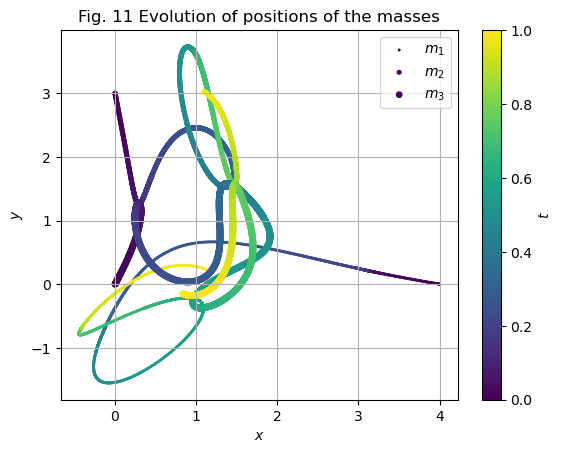

In [30]:
# plot the positions of the masses
gradient = np.linspace(0, 1, len(newton_3body_time))
plt.scatter(newton_3body_r_1.T[0], newton_3body_r_1.T[1], label = r'$m_1$', c = gradient, s = 5, marker = '.')
plt.scatter(newton_3body_r_2.T[0], newton_3body_r_2.T[1], label = r'$m_2$', c = gradient, s = 7)
plt.scatter(newton_3body_r_3.T[0], newton_3body_r_3.T[1], label = r'$m_3$', c = gradient, s = 15, marker = 'o')
cbar = plt.colorbar(); cbar.set_label(r'$t$')
plt.grid(True); plt.legend()
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.title(r'Fig. 11 Evolution of positions of the masses');

This plot can be a bit confusing since $m_1$ and $m_2$ are very close to each other, so sometimes hard to distinguish. Therefore, we show the trajectories of three bodies on the plot below in Fig. 12. This plot does not show the evolution of the system with time using gradients, but it is easier to distinguish the bodies.

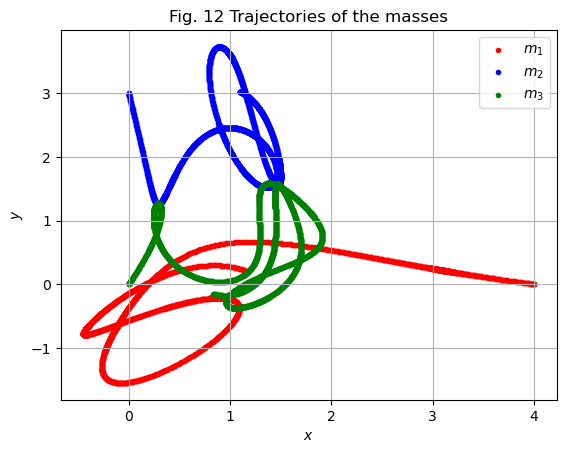

In [31]:
plt.scatter(newton_3body_r_1.T[0], newton_3body_r_1.T[1], label = r'$m_1$', c = 'red', marker = '.')
plt.scatter(newton_3body_r_2.T[0], newton_3body_r_2.T[1], label = r'$m_2$', c = 'blue', marker = '.') 
plt.scatter(newton_3body_r_3.T[0], newton_3body_r_3.T[1], label = r'$m_3$', c = 'green', marker = '.')   
plt.grid(True); plt.legend()
plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
plt.title(r'Fig. 12 Trajectories of the masses');

In general, we can see that the system is bounded and the bodies move somewhat chaotic and never reach an equilibrium point. That is what we would expect from the three body problem. $\\$

Now that we have the data and the trajectories confirming that our algorithm solved the three body problem correctly, we can analyze the results. We can calculate the total energy of the system. The total energy is the sum of the kinetic and potential energies. The kinetic energy is given by:
$$K = \frac{1}{2}mv^2$$
where $m$ is the mass of the body and $v$ is the velocity. To calculate the kinetic energy of the system, we need to add all the energies of individual bodies. The potential energy is given by:
$$U = -G\frac{m_1m_2}{r_{12}} - G\frac{m_1m_3}{r_{13}} - G\frac{m_2m_3}{r_{23}}$$
Function `Newton_grav_energy` calculates the kinetic, potential, and total energy at each time point of the data. 

In [32]:
def Newton_grav_energy(r_array, v_array, m_array = np.array([3, 4, 5]), G: float = 1):
    '''
    Calculates the kinetic energy, potential energy, and total energy of a system of three masses
    interacting through Newtonian gravity.
    
    Parameters:
    -----------
    r_array : numpy.ndarray
        Array of shape (N, 3, 3) containing the positions of the three masses at each time step. 
        Should be in the following format:
        r_array =
        [[[x_1, y_1, z_1],
            [x_2, y_2, z_2],
            [x_3, y_3, z_3]],
            ...]
            i. e. r_array[0] is an array containing positions of the three masses at time 0.
    v_array : numpy.ndarray
        Array of shape (N, 3, 3) containing the velocities of the three masses at each time step.
        The format is the same as for `r_array`.
    m_array : numpy.ndarray, optional
        Array of shape (3) containing the masses of the three masses. Default is `np.array([3, 4, 5])`.
    G : float, optional
        Gravitational constant. Default is 1.
    
    Returns:
    --------
    KE : numpy.ndarray
        Array of shape (N) containing the kinetic energy of the system at each time step.
    PE : numpy.ndarray
        Array of shape (N) containing the potential energy of the system at each time step.
    E : numpy.ndarray
        Array of shape (N) containing the total energy of the system at each time step (KE + PE).
    '''
    # Kinetic energy
    KE = .5 * np.sum(m_array * np.linalg.norm(v_array, axis = 2) ** 2, axis = 1) 
    # axis = 1 parameter will make the function calculate the norm for each row and the sum of the energies at each time point

    # Calculate distances between the masses
    r_array = np.transpose(r_array, (1, 0, 2)) # this transposition swaps the axes of the time coordinates and the masses
    # therefore r_array[0] was representing data at time 0, now it represents data for the first mass
    r_12 = r_array[0] - r_array[1]
    r_13 = r_array[0] - r_array[2]
    r_23 = r_array[1] - r_array[2]

    # Calculate potential energy
    PE_12 = -G * m_array[0] * m_array[1] / np.linalg.norm(r_12, axis = 1)
    PE_13 = -G * m_array[0] * m_array[2] / np.linalg.norm(r_13, axis = 1)
    PE_23 = -G * m_array[1] * m_array[2] / np.linalg.norm(r_23, axis = 1)
    PE = PE_12 + PE_13 + PE_23
    
    return KE, PE, KE + PE

The next physical quantity that we can calculate is the linear momentum. In Newtonian mechanics, it is given by:
$$\vec{p} = m\vec{v}$$
where $m$ is the mass of the body and $\vec{v}$ is the velocity. To calculate the linear momentum of the system, we need to add all the linear momenta of individual bodies. Function `Newton_grav_lin_momentum` calculates the linear momentum of the system and every particle at each time point of the data. $\\$

In [33]:
def Newton_grav_lin_momentum(v_array, m_array = np.array([3, 4, 5])):
    '''
    Calculates the linear momentum of a system of three particles using their masses and velocities.
    
    Parameters:
    -----------
    v_array : numpy.ndarray
        Array of shape (N, 3, 3) containing the velocities of the three masses at each time step.
        The format is the same as for `Newton_grav_energy` function.
    m_array : numpy.ndarray, optional
        Array of shape (3) containing the masses of the three masses. Default is `np.array([3, 4, 5])`.
        
    Returns:
    --------
    p_1 : numpy.ndarray
        Array of shape (N, 3) containing the linear momentum of the first mass at each time step.
    p_2 : numpy.ndarray
        Array of shape (N, 3) containing the linear momentum of the second mass at each time step.
    p_3 : numpy.ndarray
        Array of shape (N, 3) containing the linear momentum of the third mass at each time step.
    p_system : numpy.ndarray
        Array of shape (N, 3) containing the total linear momentum of the system at each time step.
    '''
    
    # Transposing the array to make the particle axis the first axis
    v_array = np.transpose(v_array, (1, 0, 2))

    # Calculating the linear momentum
    p_1 = m_array[0] * v_array[0]
    p_2 = m_array[1] * v_array[1]
    p_3 = m_array[2] * v_array[2]
    p_system = p_1 + p_2 + p_3

    return p_1, p_2, p_3, p_system

The last physical quantity that we can calculate is the angular momentum. In Newtonian mechanics, it is given by:
$$\vec{L} = \vec{r} \times \vec{p}$$
where $\vec{r}$ is the position of the body, $\vec{p}$ is the linear momentum of the body. To calculate the angular momentum of the system, we need to add all the angular momenta of individual bodies. Function `Newton_grav_ang_momentum` calculates the angular momentum of the system and every particle at each time point of the data. $\\$

In [34]:
def Newton_grav_ang_momentum(r_array, p_1_array, p_2_array, p_3_array):
    '''
    This function calculates the angular momentum of a system of three particles using their positions and linear momenta. 
    Returns the angular momentum of each particle and the total angular momentum of the system.

    Parameters:
    -----------
    r_array : numpy.ndarray
        Array of shape (N, 3, 3) containing the positions of the three masses at each time step.
        The format is the same as for `Newton_grav_energy` function.
    p_1_array : numpy.ndarray
        Array of shape (N, 3) containing the linear momentum of the first mass at each time step.
        The format is the same as for output from `Newton_grav_lin_momentum` function.
    p_2_array : numpy.ndarray
        Array of shape (N, 3) containing the linear momentum of the second mass at each time step.
        The format is the same as for `p_1_array`.
    p_3_array : numpy.ndarray
        Array of shape (N, 3) containing the linear momentum of the third mass at each time step.
        The format is the same as for `p_1_array`.
    
    Returns:
    --------
    L_1 : numpy.ndarray
        Array of shape (N, 3) containing the angular momentum of the first mass at each time step.
    L_2 : numpy.ndarray
        Array of shape (N, 3) containing the angular momentum of the second mass at each time step.
    L_3 : numpy.ndarray
        Array of shape (N, 3) containing the angular momentum of the third mass at each time step.
    L_system : numpy.ndarray
        Array of shape (N, 3) containing the total angular momentum of the system at each time step.
    '''
    # Transposing the array to make the particle axis the first axis
    r_array = np.transpose(r_array, (1, 0, 2))

    # Calculating the angular momentum
    L_1 = np.cross(r_array[0], p_1_array)
    L_2 = np.cross(r_array[1], p_2_array)
    L_3 = np.cross(r_array[2], p_3_array)
    L_system = L_1 + L_2 + L_3

    return L_1, L_2, L_3, L_system

To test these functions, we need to transform the data in the appropriate format. In order to do this, we develop a function.

In [35]:
def data_transformer(newton_3body_data, only_plot: bool = False):
    '''
    This function transforms the data for Newton 3 body problem obtained from the RK4_adaptive algorithm into a more convenient format for plotting and calculating energies and momenta.

    Parameters
    ----------
    newton_3body_data : numpy.ndarray
        The data obtained from RK4_adaptive algorithm. The format is the same as the output of the `RK4_adaptive` function if used to solve Newton 3 body problem.
    only_plot : bool, optional
        If True, the function will return only the data that can be used for plotting trajectories. By default False.

    Returns
    -------
    data_dict : dict
        Dictionary containing the data that can be used for plotting trajectories and calculating energies and momenta, depending on the value of `only_plot` parameter.
    '''
    # data that can be used for plotting trajectories
    newton_3body_time = newton_3body_data[0]
    newton_3body_r_1 = np.zeros((len(newton_3body_time), 3))
    newton_3body_r_2 = np.zeros((len(newton_3body_time), 3))
    newton_3body_r_3 = np.zeros((len(newton_3body_time), 3))
    newton_3body_v_1 = np.zeros((len(newton_3body_time), 3))
    newton_3body_v_2 = np.zeros((len(newton_3body_time), 3))
    newton_3body_v_3 = np.zeros((len(newton_3body_time), 3))
    for i in range(len(newton_3body_time)):
        newton_3body_r_1[i] = newton_3body_data[1][i * 9 : i * 9 + 3]
        newton_3body_r_2[i] = newton_3body_data[1][i * 9 + 3 : i * 9 + 6]
        newton_3body_r_3[i] = newton_3body_data[1][i * 9 + 6 : i * 9 + 9]
        newton_3body_v_1[i] = newton_3body_data[2][i * 9 : i * 9 + 3]
        newton_3body_v_2[i] = newton_3body_data[2][i * 9 + 3 : i * 9 + 6]
        newton_3body_v_3[i] = newton_3body_data[2][i * 9 + 6 : i * 9 + 9]

    # storing data in a dictionary
    data_dict = {}
    data_dict['time'] = newton_3body_time
    data_dict['r_1'] = newton_3body_r_1
    data_dict['r_2'] = newton_3body_r_2
    data_dict['r_3'] = newton_3body_r_3
    data_dict['v_1'] = newton_3body_v_1
    data_dict['v_2'] = newton_3body_v_2
    data_dict['v_3'] = newton_3body_v_3

    if not only_plot:
        # data that can be used for calculating energies and momenta
        newton_3body_r = np.zeros((len(newton_3body_time), 3, 3))
        newton_3body_v = np.zeros((len(newton_3body_time), 3, 3))
        for i in range(len(newton_3body_time)):
            newton_3body_r[i] = np.array([newton_3body_r_1[i], newton_3body_r_2[i], newton_3body_r_3[i]])
            newton_3body_v[i] = np.array([newton_3body_v_1[i], newton_3body_v_2[i], newton_3body_v_3[i]])
        
        data_dict['r'] = newton_3body_r
        data_dict['v'] = newton_3body_v

    return data_dict    

Now we can test our functions. Starting with `Newton_grav_energy`. The plot is shown below in Fig. 13. Total energy should be conserved and less than zero, since the system is bounded. 

In [36]:
newton_3body_test = data_transformer(newton_3body_data)

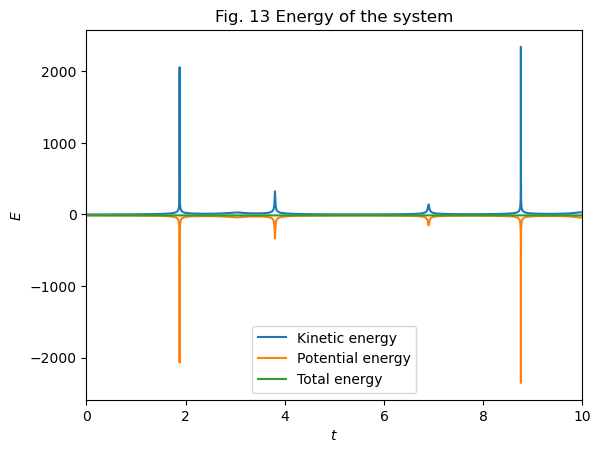

In [37]:
newton_energy_test = Newton_grav_energy(newton_3body_test['r'], newton_3body_test['v'])
plt.plot(newton_3body_test['time'], newton_energy_test[0], label = r'Kinetic energy')
plt.plot(newton_3body_test['time'], newton_energy_test[1], label = r'Potential energy')
plt.plot(newton_3body_test['time'], newton_energy_test[2], label = r'Total energy')
plt.xlabel(r'$t$'); plt.ylabel(r'$E$')
plt.xlim(0, 10)
plt.legend()
plt.title(r'Fig. 13 Energy of the system');

As we can see from the plot, the total energy is conserved and less than zero, so the algorithm works correctly. Even though, it is much smaller than some extreme values of potential and kinetic energies, the green line on the plot representing it stays constant. Also, every time the kinetic energy increases, the potential energy decreases and balances it. $\\$
Now we can move on to the function `Newton_grav_lin_momentum`. We will have plots for momentum in $x$, $y$ directions. $z$ direction will always have zero momentum, since the particles do not move on the $z$ axis. The plots are shown below in Fig. 14-16.

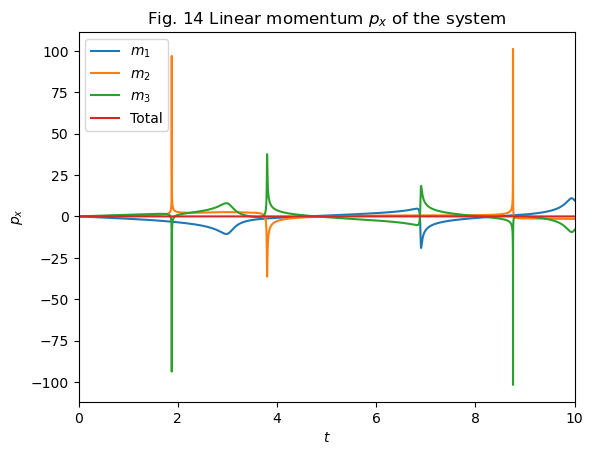

In [38]:
newton_lin_momentum_test = Newton_grav_lin_momentum(newton_3body_test['v'])
plt.plot(newton_3body_test['time'], newton_lin_momentum_test[0].T[0], label = r'$m_1$')
plt.plot(newton_3body_test['time'], newton_lin_momentum_test[1].T[0], label = r'$m_2$')
plt.plot(newton_3body_test['time'], newton_lin_momentum_test[2].T[0], label = r'$m_3$')
plt.plot(newton_3body_test['time'], newton_lin_momentum_test[3].T[0], label = r'Total')
plt.xlabel(r'$t$'); plt.ylabel(r'$p_x$')
plt.xlim(0, 10)
plt.legend()
plt.title(r'Fig. 14 Linear momentum $p_x$ of the system');

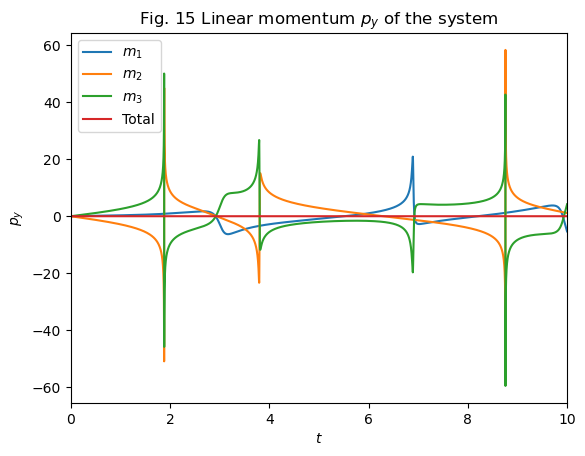

In [39]:
plt.plot(newton_3body_test['time'], newton_lin_momentum_test[0].T[1], label = r'$m_1$')
plt.plot(newton_3body_test['time'], newton_lin_momentum_test[1].T[1], label = r'$m_2$')
plt.plot(newton_3body_test['time'], newton_lin_momentum_test[2].T[1], label = r'$m_3$')
plt.plot(newton_3body_test['time'], newton_lin_momentum_test[3].T[1], label = r'Total')
plt.xlabel(r'$t$'); plt.ylabel(r'$p_y$')
plt.xlim(0, 10)
plt.legend()
plt.title(r'Fig. 15 Linear momentum $p_y$ of the system');

As we can see from the plots, the linear momentum is conserved in all directions. Similar to the energy plots, extreme positive values are balanced by extreme negative values. The system has started from the equilibrium, so the momentum was zero and it remains zero. $\\$
Now, we can test the function `Newton_grav_ang_momentum`. Here, we will only have $z$ direction, but the total angular momentum should still conserve. The plot is shown below in Fig. 17.

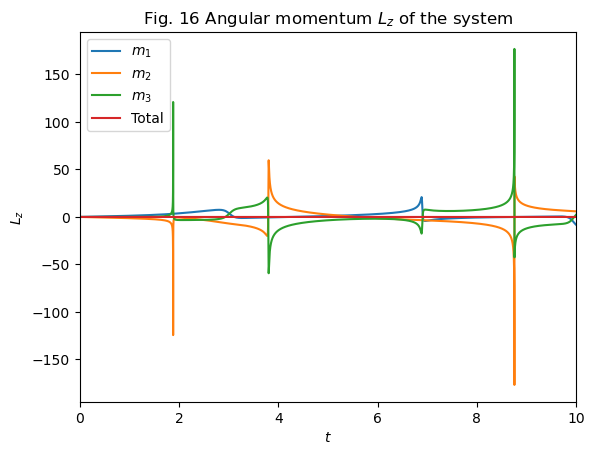

In [40]:
newton_ang_momentum_test = Newton_grav_ang_momentum(newton_3body_test['r'], newton_lin_momentum_test[0], newton_lin_momentum_test[1], newton_lin_momentum_test[2])
plt.plot(newton_3body_test['time'], newton_ang_momentum_test[0].T[2], label = r'$m_1$')
plt.plot(newton_3body_test['time'], newton_ang_momentum_test[1].T[2], label = r'$m_2$')
plt.plot(newton_3body_test['time'], newton_ang_momentum_test[2].T[2], label = r'$m_3$')
plt.plot(newton_3body_test['time'], newton_ang_momentum_test[3].T[2], label = r'Total')
plt.xlabel(r'$t$'); plt.ylabel(r'$L_z$')
plt.xlim(0, 10)
plt.legend()
plt.title(r'Fig. 16 Angular momentum $L_z$ of the system');

We observe the same situation as for the energy and linear momentum. The angular momentum is conserved and stays constant ($L_z = 0$). $\\$

Now, that we tested our functions at a decent tolerance of $10^{-10}$, we can see how increasing, or decreasing the tolerance impacts the accuracy of the simulation. We will use tolerances: $10^{-1},\, 10^{-2}, 10^{-5}, 10^{-8}$. We have already seen that at tolerance $10^{-10}$ all the physical quantities are conserved, so there is not point in testing smaller tolerance, which will also be very computationally expensive. The plots are shown below. To automatize the testing process, we developed a function `Newton_3body_tol_test`. It takes the tolerance as an input and returns the plots. $\\$

In [41]:
def Newton_3body_tol_test(tol, bracket: list = [0, 10], x_0: float = 0, r_0 = np.array([[4, 0, 0], [0, 3, 0], [0, 0, 0]]), v_0 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])):
    '''
    This function calculates the trajectories of the masses, their energies and momenta for the 3 body problem in Newtonian gravity for a given tolerance. 
    After the completing the calculations, it plots the results.

    Parameters
    ----------
    tol : float
        The tolerance for the RK4_adaptive algorithm.
    bracket : list, optional
        The bracket for the RK4_adaptive algorithm. The default is [0, 10].
    x_0 : float, optional
        The initial time. The default is 0.
    r_0 : numpy.ndarray, optional
        The initial positions of the masses. The default is np.array([[4, 0, 0], [0, 3, 0], [0, 0, 0]]).
    v_0 : numpy.ndarray, optional
        The initial velocities of the masses. The default is np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]]).
    
    Returns
    -------
    None. Plots the trajectories, energies and momenta.
    '''
    # calculate the data for the given tolerance
    newton_3body_data = RK4_adaptive(func = Newton_grav_acceleration, bracket = bracket, x_0 = x_0, y_0 = r_0, h_0 = 0.1, tol = tol, func_prime = Newton_grav_velocity, y_0_prime = v_0)

    # transform the data into a more convenient format
    newton_3body_test = data_transformer(newton_3body_data)

    # plot the trajectories of the masses
    plt.scatter(newton_3body_test['r_1'].T[0], newton_3body_test['r_1'].T[1], label = r'$m_1$', color = 'red', marker = '.')
    plt.scatter(newton_3body_test['r_2'].T[0], newton_3body_test['r_2'].T[1], label = r'$m_2$', color = 'blue', marker = '.')
    plt.scatter(newton_3body_test['r_3'].T[0], newton_3body_test['r_3'].T[1], label = r'$m_3$', color = 'green', marker = '.')
    plt.grid(True); plt.legend()
    plt.xlabel(r'$x$'); plt.ylabel(r'$y$')
    plt.title(r'Trajectories of the masses for $\epsilon = %g$' % tol);


    # calculate the energies and momenta
    newton_energy_test = Newton_grav_energy(newton_3body_test['r'], newton_3body_test['v'])
    newton_lin_momentum_test = Newton_grav_lin_momentum(newton_3body_test['v'])
    newton_ang_momentum_test = Newton_grav_ang_momentum(newton_3body_test['r'], newton_lin_momentum_test[0], newton_lin_momentum_test[1], newton_lin_momentum_test[2])

    # plot the energies and momenta
    plt.figure()
    plt.plot(newton_3body_test['time'], newton_energy_test[0], label = r'Kinetic energy')
    plt.plot(newton_3body_test['time'], newton_energy_test[1], label = r'Potential energy')
    plt.plot(newton_3body_test['time'], newton_energy_test[2], label = r'Total energy')
    plt.xlabel(r'$t$'); plt.ylabel(r'$E$')
    plt.xlim(0, 10)
    plt.legend()
    plt.title(r'Energy of the system for $\epsilon = %g$' % tol);

    plt.figure()
    plt.plot(newton_3body_test['time'], newton_lin_momentum_test[0].T[0], label = r'$m_1$')
    plt.plot(newton_3body_test['time'], newton_lin_momentum_test[1].T[0], label = r'$m_2$')
    plt.plot(newton_3body_test['time'], newton_lin_momentum_test[2].T[0], label = r'$m_3$')
    plt.plot(newton_3body_test['time'], newton_lin_momentum_test[3].T[0], label = r'Total')
    plt.xlabel(r'$t$'); plt.ylabel(r'$p_x$')
    plt.xlim(0, 10)
    plt.legend()
    plt.title(r'Linear momentum $p_x$ of the system for $\epsilon = %g$' % tol);

    plt.figure()
    plt.plot(newton_3body_test['time'], newton_lin_momentum_test[0].T[1], label = r'$m_1$')
    plt.plot(newton_3body_test['time'], newton_lin_momentum_test[1].T[1], label = r'$m_2$')
    plt.plot(newton_3body_test['time'], newton_lin_momentum_test[2].T[1], label = r'$m_3$')
    plt.plot(newton_3body_test['time'], newton_lin_momentum_test[3].T[1], label = r'Total')
    plt.xlabel(r'$t$'); plt.ylabel(r'$p_y$')
    plt.xlim(0, 10)
    plt.legend()
    plt.title(r'Linear momentum $p_y$ of the system for $\epsilon = %g$' % tol);

    plt.figure()
    plt.plot(newton_3body_test['time'], newton_ang_momentum_test[0].T[2], label = r'$m_1$')
    plt.plot(newton_3body_test['time'], newton_ang_momentum_test[1].T[2], label = r'$m_2$')
    plt.plot(newton_3body_test['time'], newton_ang_momentum_test[2].T[2], label = r'$m_3$')
    plt.plot(newton_3body_test['time'], newton_ang_momentum_test[3].T[2], label = r'Total')
    plt.xlabel(r'$t$'); plt.ylabel(r'$L_z$')
    plt.xlim(0, 10)
    plt.legend()
    plt.title(r'Angular momentum $L_z$ of the system for $\epsilon = %g$' % tol);


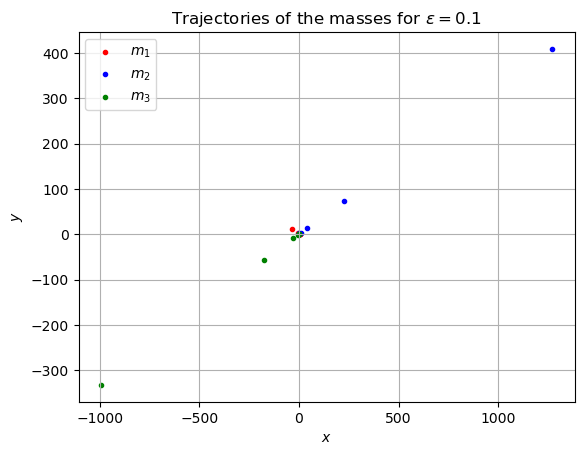

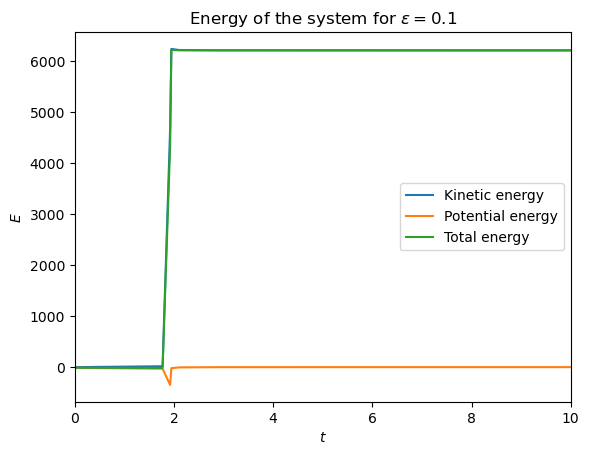

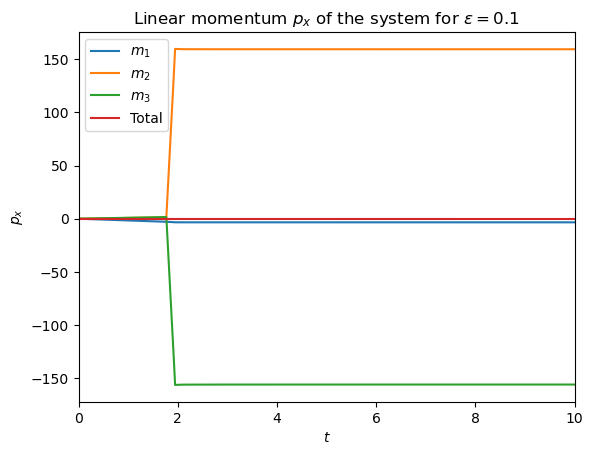

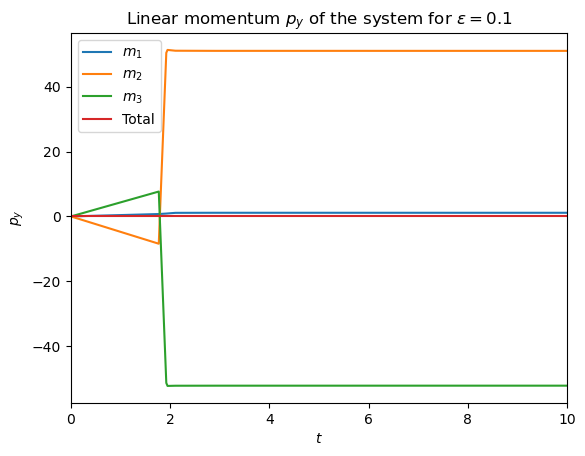

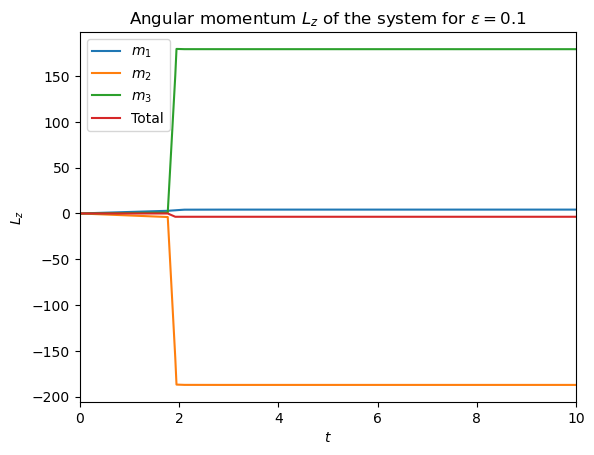

In [42]:
Newton_3body_tol_test(1e-1)

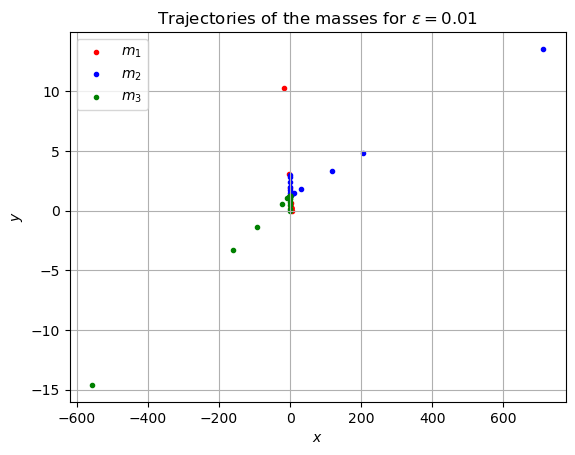

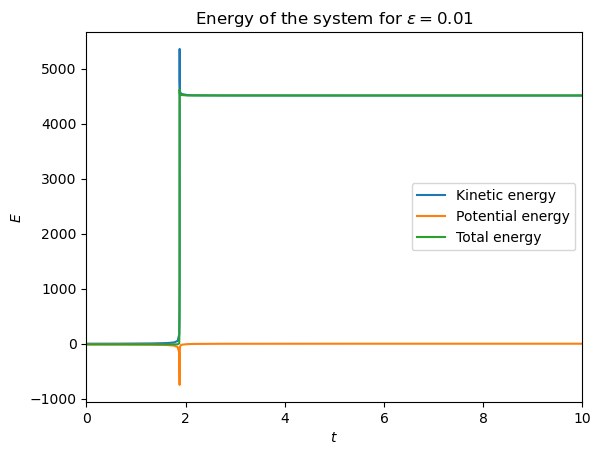

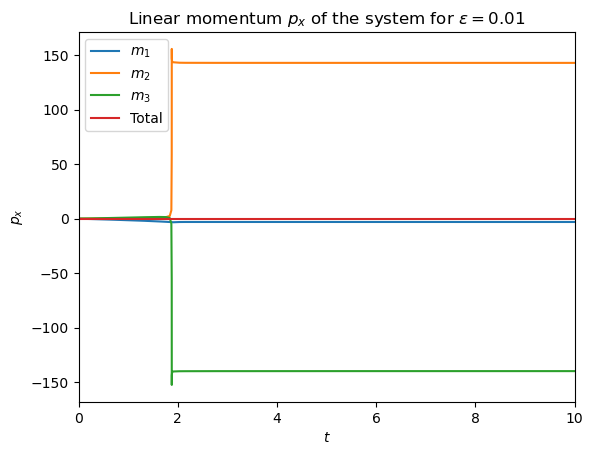

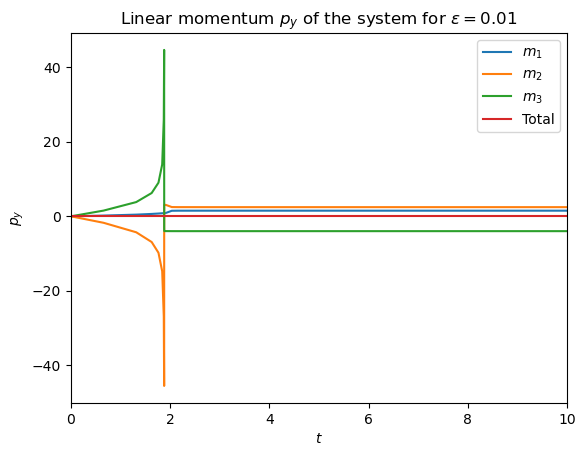

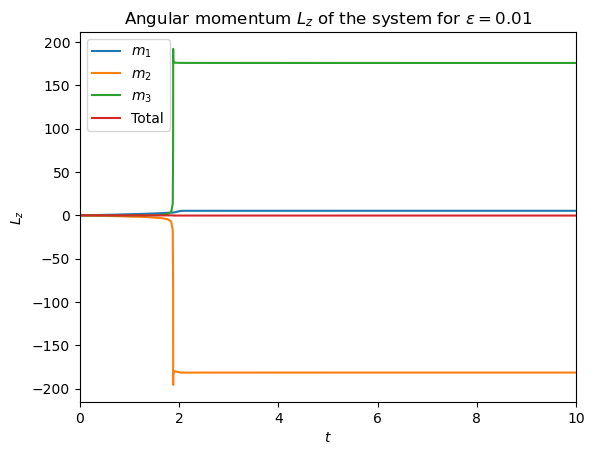

In [43]:
Newton_3body_tol_test(1e-2)

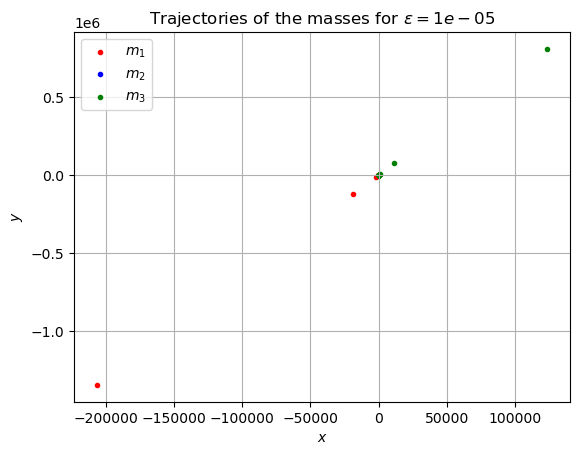

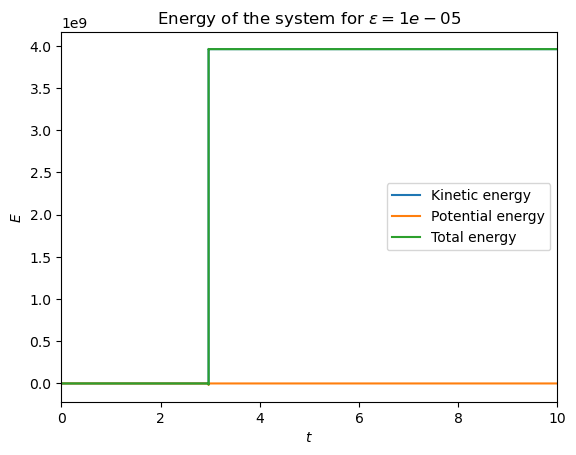

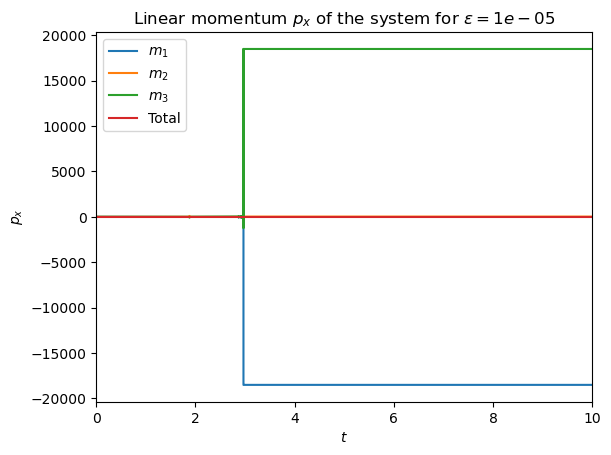

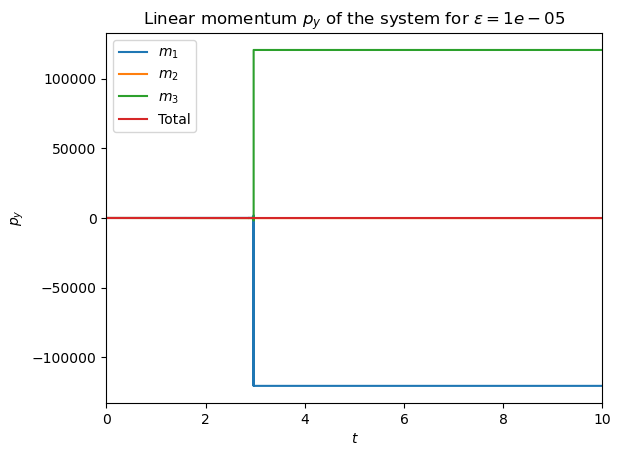

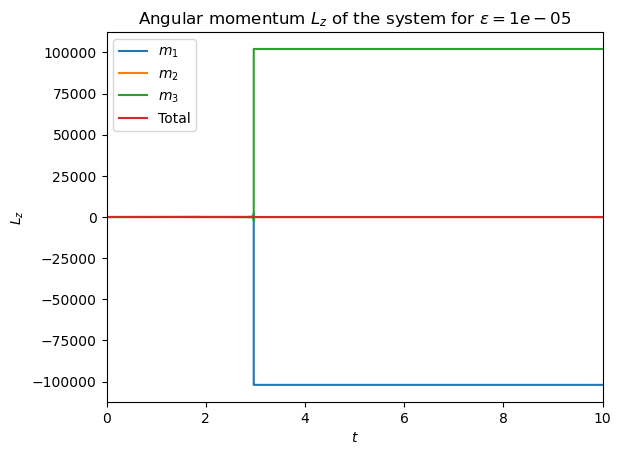

In [44]:
Newton_3body_tol_test(1e-5)

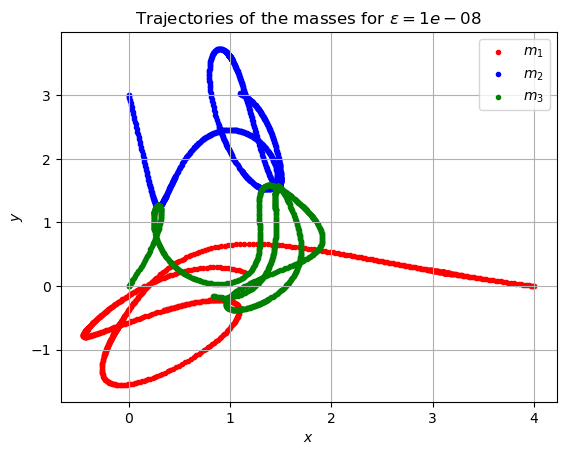

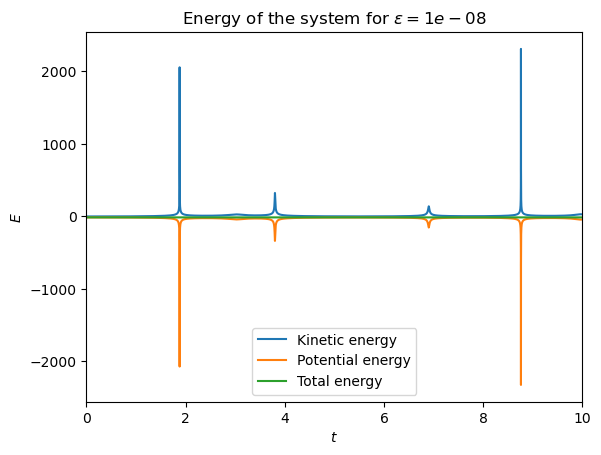

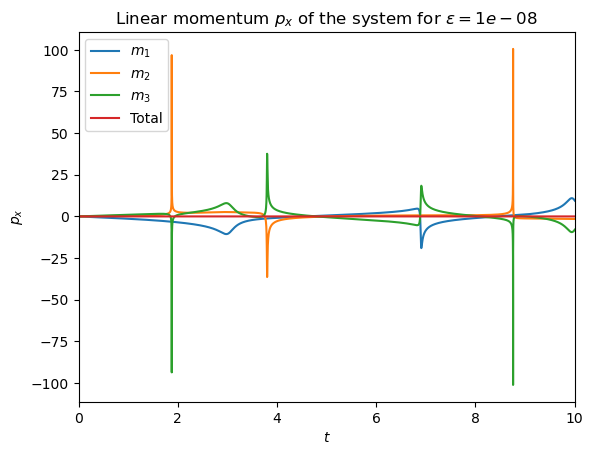

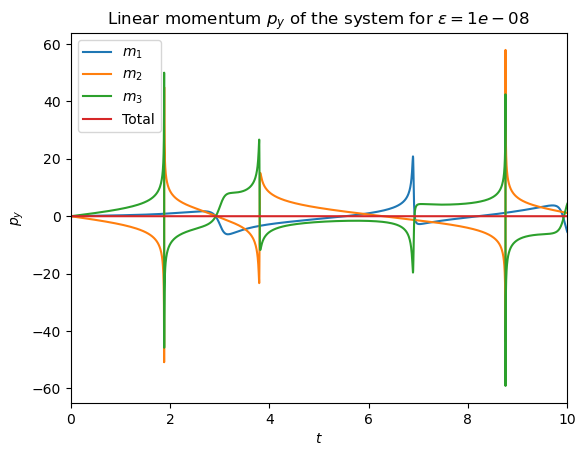

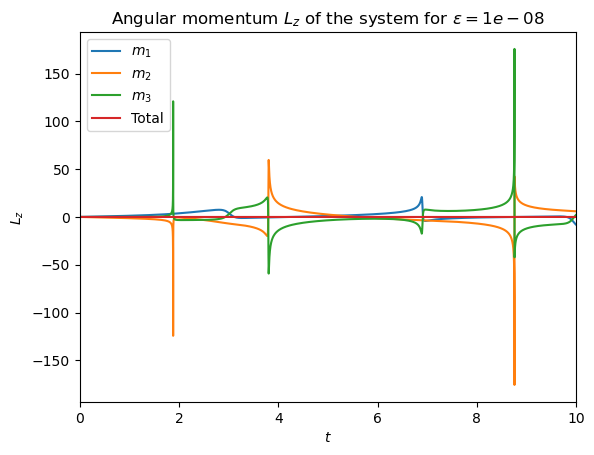

In [45]:
Newton_3body_tol_test(1e-8)

As we can see from the plots, the trajectories are not calculated correctly at tolerances larger than $10^{-8}$. They happen to have an extremely large values and the system appears unbounded and unrealistic. The total energy of the system is also conserved only at the tolerance at least as small as $10^{-8}$. The linear and angular momenta appear to be conserved at the tolerances as small $10^{-1} - 10^{-2}$, but if the tolerance is larger than $10^{-8}$, they still have large errors in comparison to the results at the tolerance $10^{-8} - 10^{-10}$. $\\$